# **Theory**
Linear regression is a technique used to predict a *quantitative* response (dependent variable) $Y$ using also quantitative predictor(s) (i.e., independent variable(s)) $X$.

## Assumptions

### Concepts
As with any model, the results we got from it are only valid under a set of assumptions because in the end, a model is a simplified version of a real-life scenario. For linear regression, here is the list of assumptions:


1. **Linearity**: There is approximately a "linear" relationship between $X$ and $Y$, which means we can represent the linear relationship as a mathematical function. "Linear" here means linear in the unknowns (i.e., the slope(s) of the function are unknowns) because no matter what values of $X$ we choose, when we plug them in the function, it is the unknowns that are added together. That is why sometimes we see that the data do not follow a straight line but we can still use linear regression for predictions:
$$
Y \approx \beta_0 + \beta_1X + ϵ \ (*)
$$
2. **Independence of Errors**: The residuals from the model should be independent of the predicted values.
3. **Homocedasticity (Equal Variance)**: The error term has a constant variance
4. **No perfect multicollinearity**: No explanatory variable is a perfect linear function of any other explanatory variables
5. **Normally Distributed Errors**: This is important for conducting hypothesis tests and constructing confidence intervals. Normality can be checked using Q-Q plots or histograms of residuals.

### How to Check Assumption Validity


1. Linearity can be checked using *a scatter plot*
2. Independence of errors can be checked by plotting a *residual plot against the fitted values*
3. Homocedasticity can be checked by a *residual plot*
4. Normality of errors can be checked by a *Q-Q plot or a histogram*
5. Multicollinearity can be checked by a *heatmap*



# **Algorithm Description**

### Loss Function (Mean Squared Errors)

To measure how well the model fits the data, we need a loss function that can guide the model towards the right direction. The most common loss function of linear regression is: **minimize the mean squared errors**.
$$
e = y-\hat{y}
$$
where $\hat{y}$ is the predicted value derived from the linear function $f(x)=\beta_0+\beta_1X$ and $y$ is the actual value of the response variable. We call $e$ the residual - the difference between the actual observed value and the predicted value. We define the sum of squared residuals as:
$$
\text{RSS} = e^2_1+e^2_2+...+e^2_n=\sum_{i=1}^n(\beta_0-\beta_1x_i-y_i)^2
$$
The linear combination can be arranged in the form of matrix multiplication: $Ax = b$, which is equivalent $\begin{bmatrix} 1 \ x_1 \\ 1 \ x_2 \\ 1 \ x_3  \\ 1 \ \dots  \\ 1 \ x_n \end{bmatrix} $ $\times$ $\begin{bmatrix} \beta_0 \\ \beta_1 \end{bmatrix} $  = $\begin{bmatrix} \beta_0 + \beta_1x_1 \\ \beta_0 + \beta_1x_2 \\ \beta_0 + \beta_1x_3 \\ \dots  \\ \beta_0 + \beta_1x_n \end{bmatrix} $
$$
\text{MSE} = \frac{1}{n}\sum_{i=1}^n(\beta_0-\beta_1x_i-y_i)^2
$$

These errors will tell the model how to update the *coefficients* such that the errors become smaller and smaller after each iteration.

### Coefficients Estimation

Given a set of data that represents $n$ observation pairs:
$$
(x_1,y_1),(x_2, y_2),...,(x_n,y_n)
$$

Our goal is to estimate $\hat{\beta_0}$ and $\hat{\beta_1}$ such that the linear model (*) fits the data well. $\beta_1$ is also called the slope that represents how much of an increase in $Y$ if we increase $X$ by one unit.

Using some calculus, the error is smallest when the slope of the loss function is equal to 0. The partial derivative of the loss function with respect to the coefficient $\beta_1$ is defined as:
$$
\begin{align*}
\hspace{0pt} \frac{\partial\text{MSE}}{\partial\beta_1} &= \frac{1}{n}\sum_{i=1}^n2(\beta_0-\beta_1x_i-y_i)\frac{\partial\text{MSE}}{\partial\beta_1}(\beta_0-\beta_1x_i-y_i) \\
\hspace{0pt} \frac{\partial\text{MSE}}{\partial\beta_1} &= \frac{2}{n}\sum_{i=1}^nx_i(\beta_0-\beta_1x_i-y_i)
\end{align*}
$$

The partial derivative with respect to the intercept is:

$$
\begin{align*}
\hspace{0pt} \frac{\partial\text{MSE}}{\partial\beta_0} &= \frac{1}{n}\sum_{i=1}^n2(\beta_0-\beta_1x_i-y_i)\frac{\partial\text{MSE}}{\partial\beta_0}(\beta_0-\beta_1x_i-y_i) \\
\hspace{0pt} \frac{\partial\text{MSE}}{\partial\beta_0} &= \frac{2}{n}\sum_{i=1}^n(\beta_0-\beta_1x_i-y_i)
\end{align*}
$$

So, the partial derivative lets us know in which direction the error is heading towards, if the sign of the slope is negative, it means we're heading towards the smaller value and otherwise.

### Updating Coefficients & Intercept

Now that we have a mathematical function that tells you which way the slope is heading towards, we need an update function to update the weights such that it comes closer to the point where the slope is equal to 0. Therefore, we need to define the *learning rate $\alpha$* - how much the intercept and the coefficient are updated:
$$
\beta_{i+1}=\beta_{i}-\alpha \frac{\partial\text{MSE}}{\partial{\beta_1}}
$$

# **Evaluation**

## R-squared

## Adjusted R-squared

# **Implementation**

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import scipy.stats as sts

## EDA (Explanatory Data Analysis)

The purpose of EDA is to explore the properties of data and check if the assumptions are met. There are 5 assumptions that we've identified earlier that need to be checked. This helps us understand the final performance of the model better

In [23]:
np.random.seed(42)

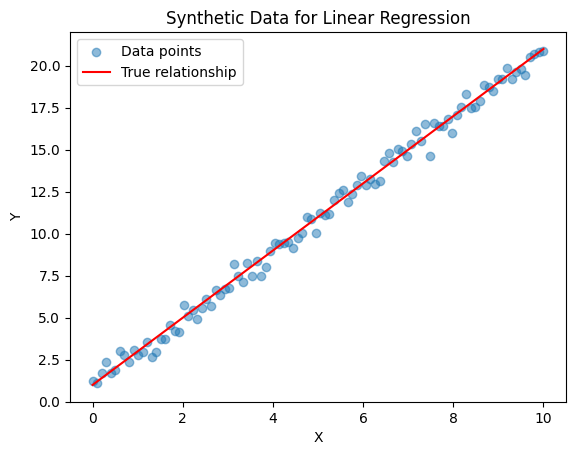

In [24]:
# Synthetic data
X = np.linspace(0, 10, 100).reshape(-1, 1)
true_b = 2
true_intercept = 1
noise = noise = np.random.normal(0, 0.5, 100)
Y = true_b * X.flatten() + true_intercept + noise


plt.scatter(X, Y, alpha=0.5, label='Data points')
plt.plot(X, true_b * X + true_intercept, 'r', label='True relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Synthetic Data for Linear Regression')
plt.legend()
plt.show()

### Q-Q Plot
A Q-Q (Quantile-Quantile) plot is used to see if a dataset follows a particular theoretical distribution (e.g., normal, uniform, ...). It uses the PPF (percent-point function) to find the corresponding value for the rank. Q-Q plot is used to check for our assumptions about the distribution that the data follows. This graph is used to check whether the dependent variable or the residuals are normally distributed.

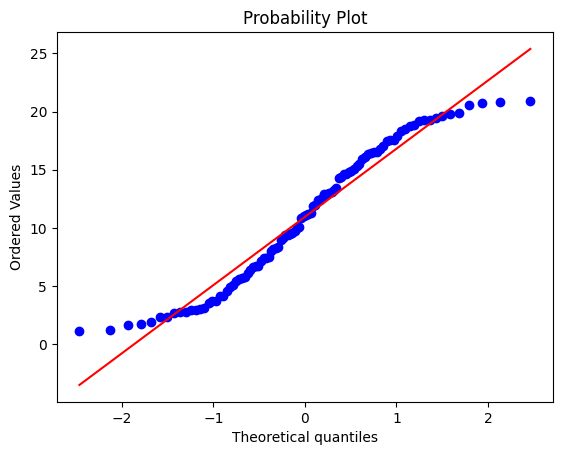

In [28]:
sts.probplot(Y, dist="norm", plot=plt)
plt.show()

## Code From Scratch

### Linear Regression With One Feature (Independent Variables)

In [ ]:
class LinearRegressionOneVariable:

  # Initialize model's parameters
  def __init__(self,
               X, # in this case, this is a vector b/c there is only one feature
               Y, # a vector of values
               b, # slope of the function
               intercept,
               learning_rate
               ):
    self.X = np.array(X).flatten()  # Ensure 1D array
    self.Y = np.array(Y).flatten()  # Ensure 1D array
    self.b = float(b)               # Scalar value for slope
    self.intercept = float(intercept)  # Scalar value for intercept
    self.alpha = learning_rate
    self.loss_history = []

  # Mathematical function of linear regression
  def f(self):
    predicted_y = self.intercept + self.X * self.b
    return predicted_y

  # Specify loss function
  def loss(self):
      mse = np.mean((self.f() - self.Y)**2)
      self.loss_history.append(mse)
      return mse

  # Specify how to update the coefficients
  def update(self):
    predictions = self.f()
    
    partial_b = (2/len(self.X)) * np.sum((predictions - self.Y)*self.X)
    partial_i = (2/len(self.X)) * np.sum(predictions - self.Y)

    self.b -= self.alpha * partial_b
    self.intercept -= self.alpha * partial_i

  # Visualize
  def plot_loss(self):
    plt.plot(self.loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Loss History')
    plt.show()

In [ ]:
model1 = LinearRegressionOneVariable(
    X=X,
    Y=Y,
    b=0, # initial guess
    intercept=0, # initial guess
    learning_rate=0.001
)

Iteration 0, Loss: 133.92681622299938
Iteration 10, Loss: 32.61600555764032
Iteration 20, Loss: 8.110713276946253
Iteration 30, Loss: 2.182814585357244
Iteration 40, Loss: 0.7483421594723221
Iteration 50, Loss: 0.40072676633147203
Iteration 60, Loss: 0.31600209330546636
Iteration 70, Loss: 0.2948706649412373
Iteration 80, Loss: 0.289127205943095
Iteration 90, Loss: 0.2871119702358259


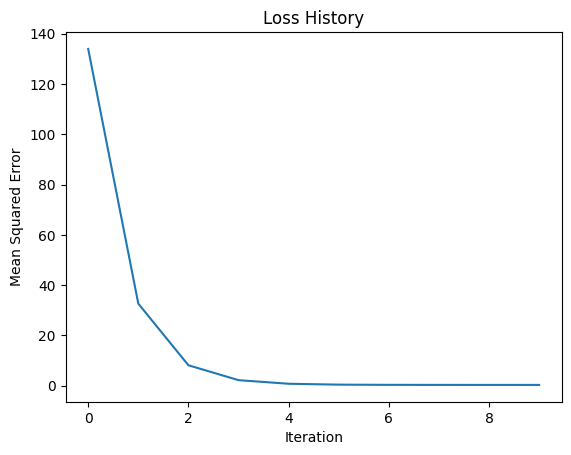

In [ ]:
for i in range(100):
  model1.update()
  if i%10 == 0:
    current_loss = model1.loss()
    print(f"Iteration {i}, Loss: {current_loss}")

model1.plot_loss()

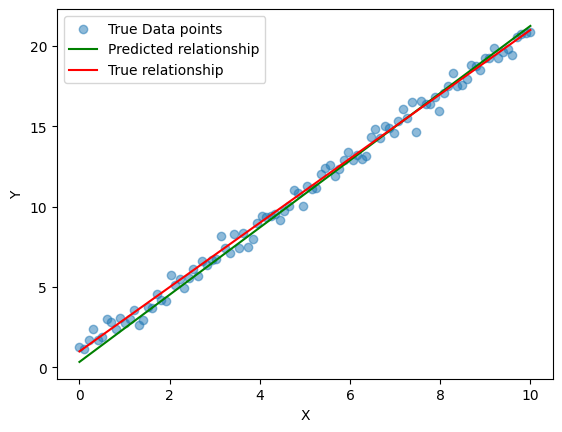

True parameters: b=2, intercept=1
Learned parameters: b=2.0908, intercept=0.3440


In [ ]:
plt.scatter(X, Y, alpha=0.5, label='True Data points')
plt.plot(X, model1.f(), 'g', label='Predicted relationship')
plt.plot(X, true_b * X + true_intercept, 'r', label='True relationship')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

print(f"True parameters: b={true_b}, intercept={true_intercept}")
print(f"Learned parameters: b={model1.b:.4f}, intercept={model1.intercept:.4f}")



### Multiple Linear Regression With $\geq$ 2 Features

In [ ]:
class LinearRegressionMultipleVariable:

  # Initialize model's parameters
  def __init__(self,
               X, # a matrix b/c there are many features
               Y, # a vector of values
               b, # a matrix of coefficients associated with each feature
               intercept,
               learning_rate
               ):
    self.X = X
    self.Y = Y
    self.b = np.array(b)
    self.intercept = intercept
    self.alpha = learning_rate
    self.loss_history = []

  # Mathematical function of linear regression
  def f(self, X):
    predicted_y = self.intercept + np.dot(X, self.b)
    return predicted_y

  # Specify loss function
  def loss(self):
    mse = np.mean((self.f(X) - Y)**2) # element-wise operation
    self.loss_history.append(mse)
    return mse

  # Specify how to update the coefficients
  def update(self):
    Y = self.Y.flatten()
    predictions = self.f(self.X)

    partial_b = (2/len(Y)) * np.dot(self.X.T, (predictions - Y))
    partial_i = (2/len(Y)) * np.sum(predictions - Y)

    self.b -= self.alpha * partial_b
    self.intercept -= self.alpha * partial_i

  # Visualize loss
  def plot_loss(self):
    plt.plot(self.loss_history)
    plt.xlabel('Iteration')
    plt.ylabel('Mean Squared Error')
    plt.title('Loss History')
    plt.show()

In [ ]:
# For 2 features
num_points = 100
x1_range = (1, 10)
x2_range = (2, 10)

# Generate random values for X within the specified ranges
X = np.random.uniform(low=[x1_range[0], x2_range[0]], 
                      high=[x1_range[1], x2_range[1]], 
                      size=(num_points, 2))

true_b = np.array([5, 2])  # Coefficients for the two features
true_intercept = 10

# Generate Y based on the linear relationship and add some noise
noise = np.random.normal(scale=5, size=num_points)  # Gaussian noise
Y = true_intercept + np.dot(X, true_b) + noise

b_initial = np.zeros(2)
model2 = LinearRegressionMultipleVariable(X, Y, b_initial, intercept=0, learning_rate=0.01)

print("Shape of X:", X.shape)
print("Shape of Y:", Y.shape)

b_initial = np.zeros(2)  # Initial coefficients for 3 features
model2 = LinearRegressionMultipleVariable(X, Y, b_initial, intercept=0, learning_rate=0.01)

In [ ]:
# Calculate the correlation matrix
correlation_matrix = np.corrcoef(X.T)  # Transpose X for correct calculation

# Create the heatmap with annotations
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", 
            xticklabels=['Feature 1', 'Feature 2'], 
            yticklabels=['Feature 1', 'Feature 2'])
plt.title('Correlation Matrix of Features')
plt.show()

In [ ]:
for i in range(100):
  model2.update()
  if i%10 == 0:
    current_loss = model2.loss()
    print(f"Iteration {i}, Loss: {current_loss}")

model2.plot_loss()

In [ ]:
# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.view_init(elev=10, azim=45)

# Scatter plot of the data points
ax.scatter(X[:, 0], X[:, 1], Y, c='r', marker='o', label='Data points')

# Create a meshgrid for the plane
x1_range = np.linspace(X[:, 0].min(), X[:, 0].max(), 10)
x2_range = np.linspace(X[:, 1].min(), X[:, 1].max(), 10)
X1, X2 = np.meshgrid(x1_range, x2_range)
Z = model2.intercept + model2.b[0] * X1 + model2.b[1] * X2 # Predicted values

# Plot the regression plane
ax.plot_surface(X1, X2, Z, alpha=0.5, label='Regression plane')

# Set labels and title
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
ax.set_title('3D Plot of Multiple Linear Regression')
ax.legend()

plt.show()

## Code Using Library

# **Examples With Real Datasets**
1. California Housing
2. Something scraped from the Internet

# References


1. https://en.wikipedia.org/wiki/Linear_function
2. https://online.stat.psu.edu/stat200/book/export/html/507
3. https://www.datacamp.com/tutorial/qq-plot

